### Import Libraries 

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

C:\Users\gokha\AppData\Local\Temp\ipykernel_31188\4190186585.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Import Data

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')

df.head()


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Preprocessing 

In [5]:
#One hot encoding 
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [6]:
pd.set_option('future.no_silent_downcasting', True)
df_sydney_processed.replace(['No', 'Yes'], [0, 1], inplace=True)


### Train and Test dataset

In [7]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [8]:
df_sydney_processed = df_sydney_processed.astype(float)

In [9]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

In [10]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression

In [11]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(features,Y,test_size=0.2, random_state=10)


In [12]:
#Create model
regr = LinearRegression()
LinearReg = regr.fit(x_train,y_train)


In [13]:
#predict
predictions_lm = regr.predict(x_test)
predictions_lm[0:5]


array([0.13184071, 0.2761859 , 0.97818819, 0.2874561 , 0.13241371])

In [14]:
#Accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


LinearRegression_MAE = mean_absolute_error(y_test,predictions_lm)
LinearRegression_MSE = mean_squared_error(y_test,predictions_lm)
LinearRegression_R2 = r2_score(y_test,predictions_lm)
print(LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2)


0.25631760994203784 0.11572058282746585 0.4271321073623009


In [15]:
results_lm = [LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]
Report = pd.DataFrame(results_lm)
results_lm = Report.T.rename(columns={0:"MAE",1:"MSE",2:"R2"})
print(results_lm)

        MAE       MSE        R2
0  0.256318  0.115721  0.427132


### KNN

In [16]:
from sklearn.model_selection import cross_val_score
#optimal k value 
k_values = range(1,31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train,y_train, cv=10, scoring="accuracy")
    cv_scores.append(scores.mean())
    

error_rates = [1- score for score in cv_scores]

optimal_k = k_values[(error_rates.index(min(error_rates)))]
print(f"optimal k value: {optimal_k}")


optimal k value: 16


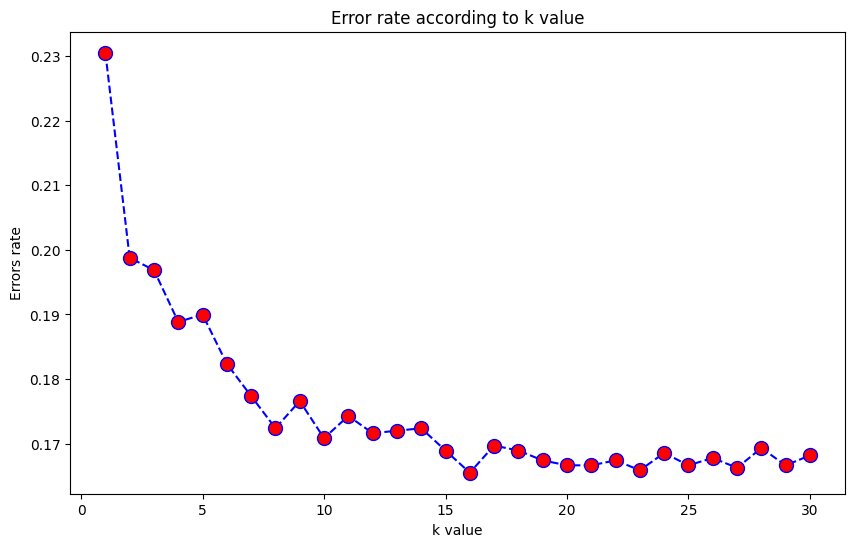

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate according to k value')
plt.xlabel('k value')
plt.ylabel('Errors rate')
plt.show()


In [18]:
#Model fit
KNN = KNeighborsClassifier(n_neighbors=optimal_k,).fit(x_train,y_train)


In [19]:
#Predict
predictions_knn = KNN.predict(x_test)


In [20]:
#Accuracy
from sklearn.metrics import accuracy_score, jaccard_score, f1_score

KNN_accuracy_score = accuracy_score(y_test,predictions_knn)
KNN_jaccard_score = jaccard_score(y_test,predictions_knn)
KNN_f1_score = f1_score(y_test,predictions_knn)

result_knn = pd.DataFrame({
    "Accuracy Score" : [KNN_accuracy_score],
    "Jaccard Score" : [KNN_jaccard_score],
    "F1 Score" : [KNN_f1_score]
})

print(result_knn)

   Accuracy Score  Jaccard Score  F1 Score
0        0.830534       0.455882  0.626263


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#Hyperparameter Optimization 
dt = DecisionTreeClassifier()



#Hiperparametre grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

#Grid Search
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_dt.fit(x_train, y_train)


print(f'Best parameters: {grid_search_dt.best_params_}')
print(f'Best accuracy: {grid_search_dt.best_score_}')


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
Best accuracy: 0.8077291900807145


In [22]:
#predict
predictions_dt = grid_search_dt.predict(x_test)


In [23]:
#Accuracy
dt_accuracy_score = accuracy_score(y_test,predictions_dt)
dt_jaccard_score = jaccard_score(y_test,predictions_dt)
dt_f1_score = f1_score(y_test,predictions_dt)

result_dt =  pd.DataFrame({
    "Accuracy_Score" : [dt_accuracy_score],
    "Jaccard" : [dt_jaccard_score],
    "F1_Score" : [dt_f1_score]
})


print(result_dt)

   Accuracy_Score   Jaccard  F1_Score
0        0.812214  0.450893  0.621538


### Logistic Regression

In [24]:
warnings.filterwarnings("ignore", category=UserWarning)
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [25]:
predictions_lr = LR.predict(x_test)
predict_proba = LR.predict_proba(x_test)


In [26]:
LR_Accuracy_Score = accuracy_score(y_test,predictions_lr)
LR_JaccardIndex = jaccard_score(y_test,predictions_lr)
LR_F1_Score =  f1_score(y_test,predictions_lr)
LR_Log_Loss = log_loss(y_test,predict_proba)
result_lr = pd.DataFrame({
    "Accuracy_Score" : [LR_Accuracy_Score],
    "Jaccard" : [LR_JaccardIndex],
    "F1_Score" : [LR_F1_Score],
    "Log_Loss" : [LR_Log_Loss]
})
print(result_lr)


   Accuracy_Score   Jaccard  F1_Score  Log_Loss
0        0.844275  0.518868   0.68323  0.367024


### Support Vector Machine 

In [27]:
#model
SVM = svm.SVC(kernel="linear")
SVM.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
#predictions
predictions_svm = SVM.predict(x_test)


In [29]:
SVM_Accuracy_Score = accuracy_score(y_test,predictions_svm)
SVM_JaccardIndex = jaccard_score(y_test,predictions_svm)
SVM_F1_Score = f1_score(y_test,predictions_svm)
result_svm = pd.DataFrame({
    "Accuracy_Score" : [SVM_Accuracy_Score],
    "Jaccard" : [SVM_JaccardIndex],
    "F1_Score" : [SVM_F1_Score]
})
print(result_svm)

   Accuracy_Score   Jaccard  F1_Score
0        0.838168  0.518182  0.682635


In [30]:
model_name = ["Linear Regression","KNN","Decion Tree","Logistic Regression","SVM"]
Report = pd.concat([results_lm,result_knn,result_dt,result_lr,result_svm])
Report = Report.fillna("-")
Report["Model_Name"] = model_name
Report = Report[["Model_Name","MAE","MSE","R2","Accuracy_Score","Jaccard","F1_Score","Log_Loss"]]
Report

,Model_Name,MAE,MSE,R2,Accuracy_Score,Jaccard,F1_Score,Log_Loss
0,Linear Regression,0.256318,0.115721,0.427132,-,-,-,-
0,KNN,-,-,-,-,-,-,-
0,Decion Tree,-,-,-,0.812214,0.450893,0.621538,-
0,Logistic Regression,-,-,-,0.844275,0.518868,0.68323,0.367024
0,SVM,-,-,-,0.838168,0.518182,0.682635,-
